In [15]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import os

In [6]:
print(os.getcwd())
wave_path = "./bed_0b56bcfe_nohash_0.wav"
print(torchaudio.info(wave_path))

c:\DOCUMENT\Xe-blogs\source\_posts\从空气震动到梅尔频谱图
AudioMetaData(sample_rate=16000, num_frames=16000, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [12]:
wave = torchaudio.load(wave_path, normalize=False)
print(wave)
wave = torchaudio.load(wave_path, normalize=True)
print(wave)


(tensor([[ 6, 11, 15,  ...,  7, 12, 11]], dtype=torch.int16), 16000)
(tensor([[0.0002, 0.0003, 0.0005,  ..., 0.0002, 0.0004, 0.0003]]), 16000)


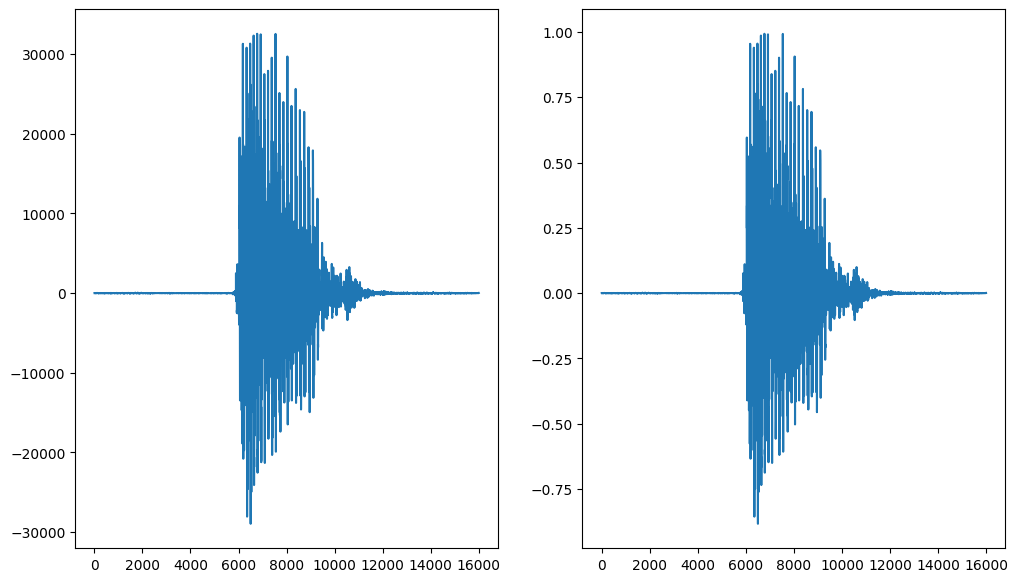

In [60]:
wave = []
wave.append(torchaudio.load(wave_path, normalize=False))
wave.append(torchaudio.load(wave_path, normalize=True))

fig, axes = plt.subplots(1, 2, figsize=(12, 7))
x = torch.arange(1, 16000+1, 1)
for index, ax in enumerate(axes):
    y = wave[index][0][0]
    ax.plot(x, y)

16000
tensor([114381.0000, 113926.7969, 111315.3984,  ..., 107403.2188,
        111315.3984, 113926.7969])
16000
tensor([3.4906, 3.4768, 3.3971,  ..., 3.2777, 3.3971, 3.4768])


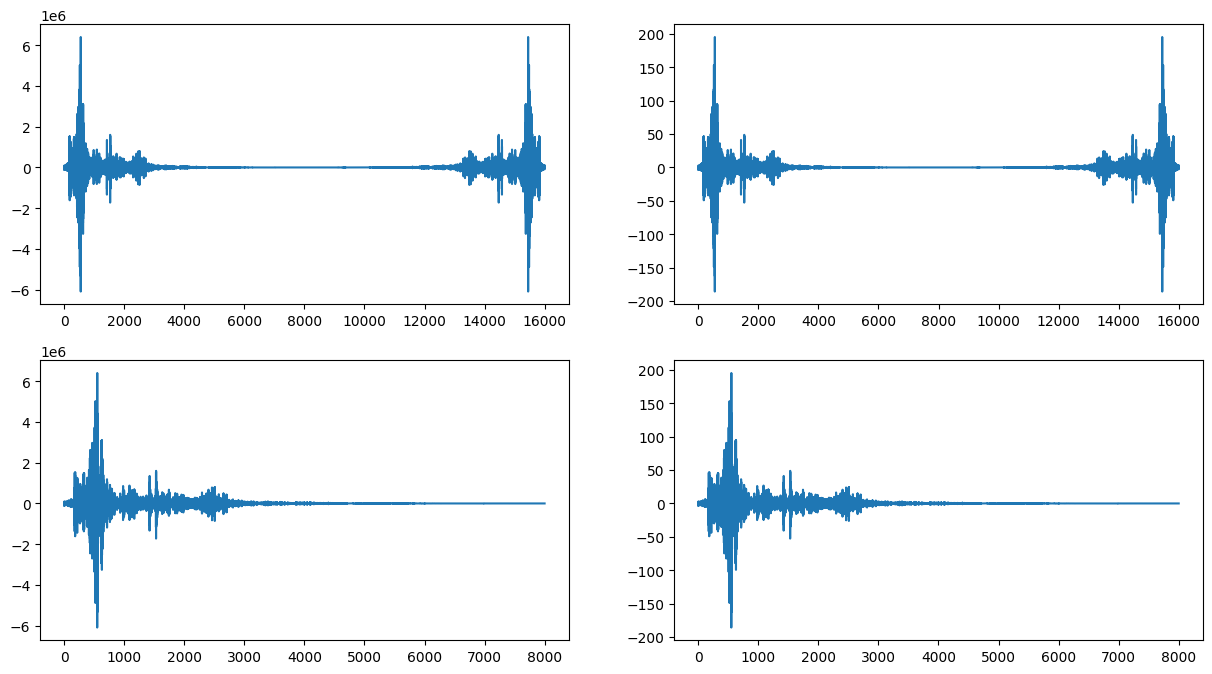

In [53]:
specgram = []
for i in wave:
    specgram.append(torch.fft.fft(i[0][0]))
for i in specgram:
    print(len(i))
    print(torch.abs(i))

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
x = torch.arange(1, 16000+1, 1)
for index, ax in enumerate(axes[0]):
    y = specgram[index]
    ax.plot(x, y)

x = torch.arange(1, 16000//2+1, 1)
for index, ax in enumerate(axes[1]):
    y = specgram[index][0:16000//2]
    ax.plot(x, y)




In [72]:
# 这里是直接从时域图到时频图，一步到位
print(f"时域信号：{wave[1][0][0]}")
n_fft = 600
hop_length = 300
window_fn = torch.hann_window
spectrogram = torchaudio.transforms.Spectrogram(n_fft=n_fft, hop_length=hop_length, window_fn=window_fn, power=1, center=False)
one_specgram = spectrogram(wave[1][0][0])
print(f"频域信号：{one_specgram.shape}")

时域信号：tensor([0.0002, 0.0003, 0.0005,  ..., 0.0002, 0.0004, 0.0003])
频域信号：torch.Size([301, 52])


Text(0, 0.5, 'Frequency')

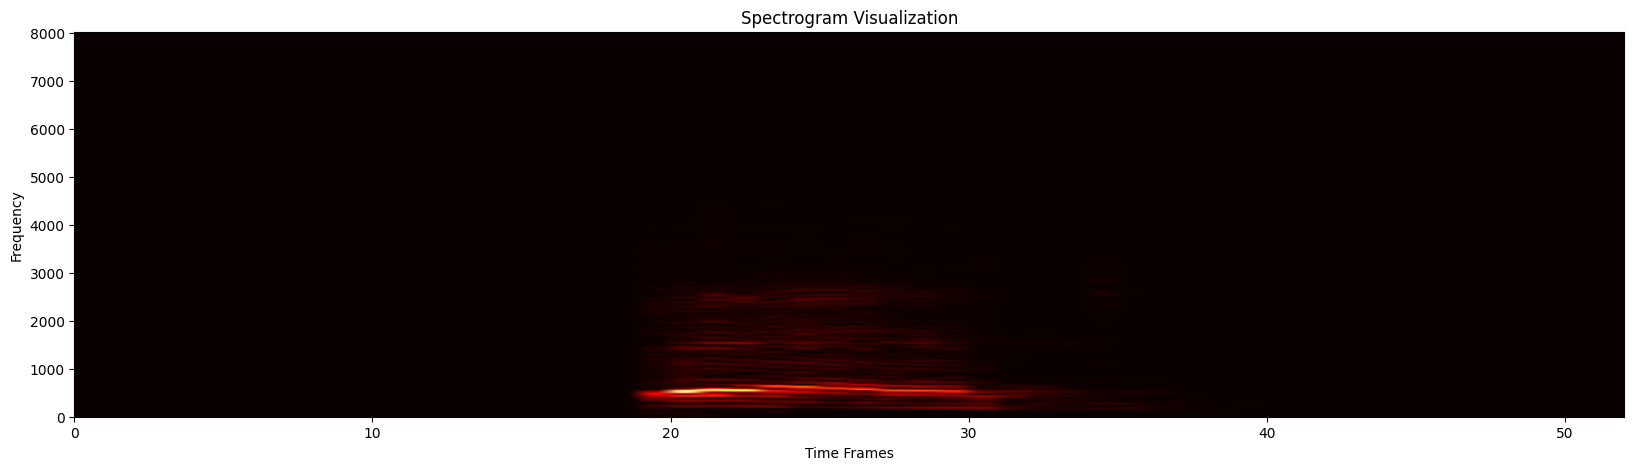

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
axes.imshow(one_specgram, aspect="auto", origin="lower", cmap="hot", extent=[0, one_specgram.shape[1], 0, int(one_specgram.shape[0]*(16000/600))])
axes.set_title("Spectrogram Visualization")
axes.set_xlabel("Time Frames")
axes.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

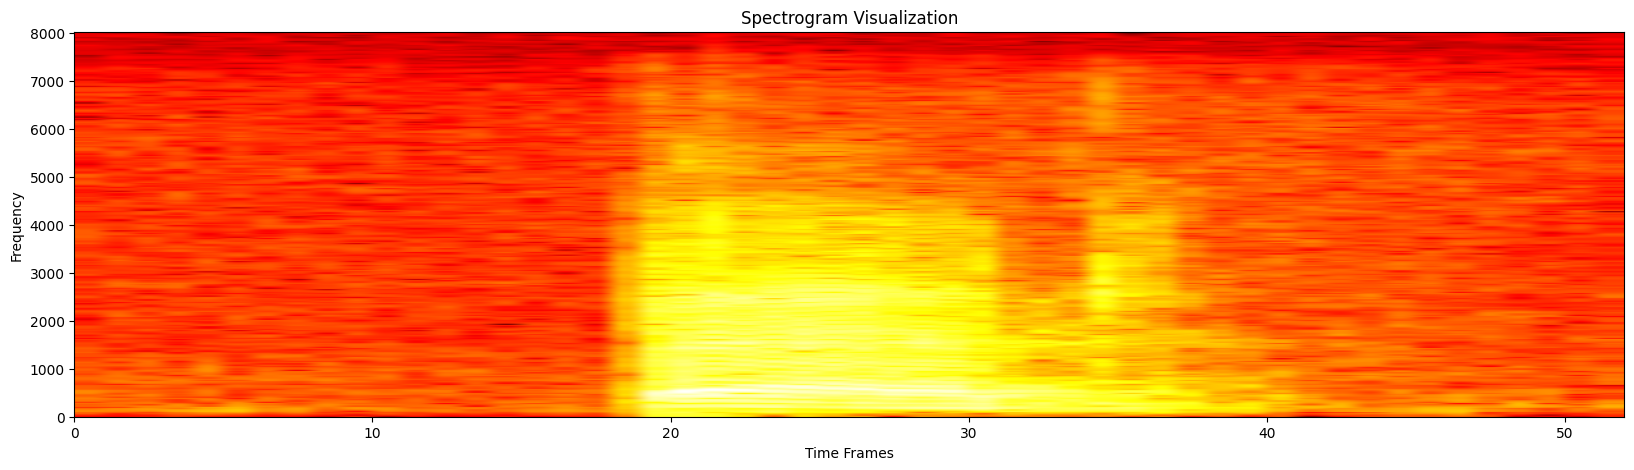

In [97]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
axes.imshow(10*torch.log10(one_specgram), aspect="auto", origin="lower", cmap="hot", extent=[0, one_specgram.shape[1], 0, int(one_specgram.shape[0]*(16000/600))])
axes.set_title("Spectrogram Visualization")
axes.set_xlabel("Time Frames")
axes.set_ylabel("Frequency")